<a href="https://colab.research.google.com/github/Cyrus-White/HW-Project-Files-/blob/main/HW3Q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step - loss: 63.3948 - mae: 5.6510 - val_loss: 47.6506 - val_mae: 5.4963
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 52.8248 - mae: 5.2484 - val_loss: 31.0726 - val_mae: 4.5427
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 30.8621 - mae: 4.3267 - val_loss: 22.4749 - val_mae: 3.8964
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 17.6952 - mae: 3.2570 - val_loss: 14.5585 - val_mae: 3.0360
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 11.3178 - mae: 2.5332 - val_loss: 11.9245 - val_mae: 2.6757
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 9.4930 - mae: 2.2233 - val_loss: 10.0858 - val_mae: 2.4289
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 8.5661 - mae: 2.1317 - val_loss: 9.0338 - val_mae: 2.3099
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 7.9090 - mae: 2.0260 - val_loss: 8.2937 - val_mae: 2.2064
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 7.

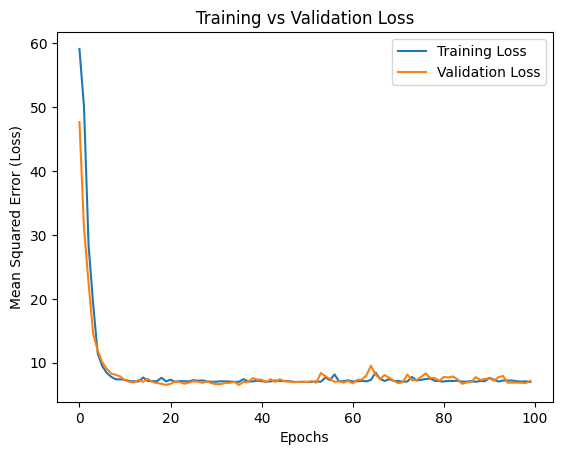

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Predicted price for a house in a city with population 165,000: $204,340.83


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset (Replace with the actual dataset file)
df = pd.read_csv('HousingPrices.txt')

# Assume the dataset has features in X and target price in y
X = df.iloc[:, :-1].values  # Features (excluding target price)
y = df.iloc[:, -1].values   # Target variable (price)

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split dataset (70% training, 30% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=42)

# Define the Neural Network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='relu', input_shape=(X_train.shape[1],)),  # Hidden layer with 2 neurons
    tf.keras.layers.Dense(1)  # Output layer (Regression task)
])

# Compile the model with SGD optimizer and MSE loss
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, verbose=1)

# Plot Training & Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (Loss)')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

# Predict the price for a house with a population of 165,000
house_features = np.array([[165000]])  # Adjust based on actual dataset features
house_features = scaler.transform(house_features)  # Normalize input
predicted_price = model.predict(house_features)
print(f"Predicted price for a house in a city with population 165,000: ${predicted_price[0][0]:,.2f}")